# Week I: setting up a Python environment for data science


## Introduction

Throughout this course we are going to showcase a variety of machine learning algorithms. You will create experiments based on those algorithms on different datasets and reach you own conclusions. All instructions will be given in Python, hence a familiarity with the language is mandatory. 

In our first class, we're going to setup a Python environment together and discuss the best practices to follow. We'll finish the class with a short example of a simple machine learning algorithm.


## Course structure

The course is split into 5 main parts with some overlap:

*   Classical ML
*   Computer vision
*   Natural language processing
*   Time series
*   Advanced deep learning methods


## Logistics/administrative aspects 

Feel free to ask any questions: odedovadia@mail.tau.ac.il.

Office hours: please coordinate beforehand.

Grade:
*   3 mandatory code chores (in teams of 3-4)  - 30%
*   Final projects (in teams of 3-4) - 70%



## Why Python?

Python is currently by far the most dominant langauge in the field of data science:


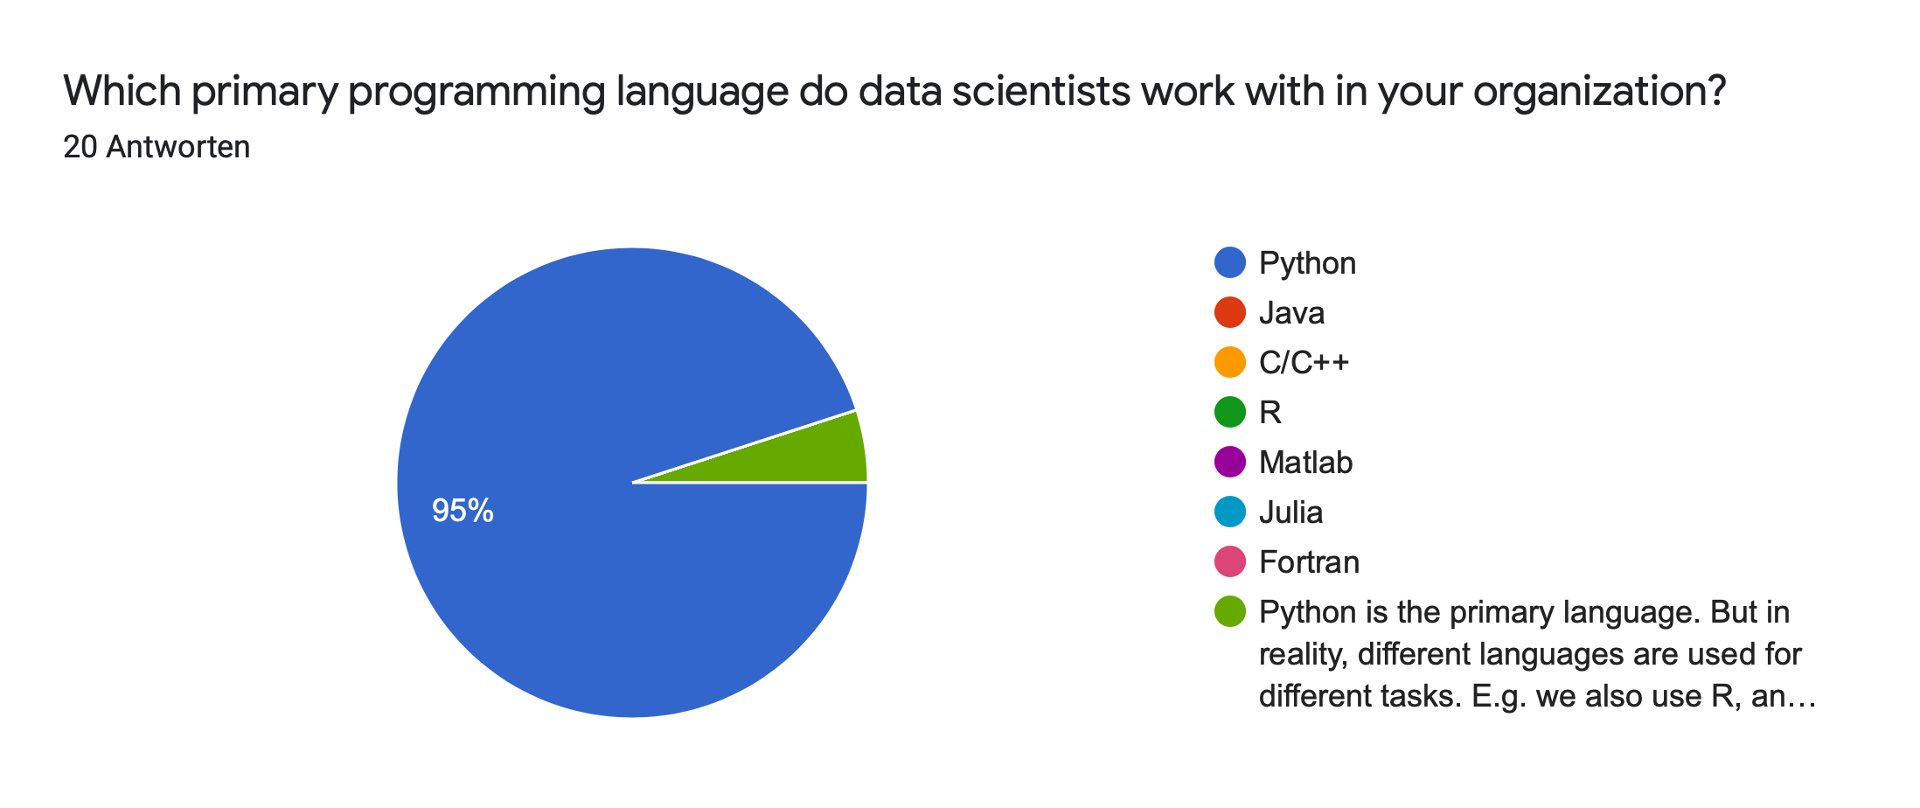


However, each of these langauges has its own specialities: SQL has a strong focus on databases, and R is very statitstics oriented. In comparison, Python is a [general purpose langage](https://en.wikipedia.org/wiki/General-purpose_programming_language), which makes it more versatile. Consequently, it can be used in practically any scenario. Moreover, it has one of the largest user bases in the world:


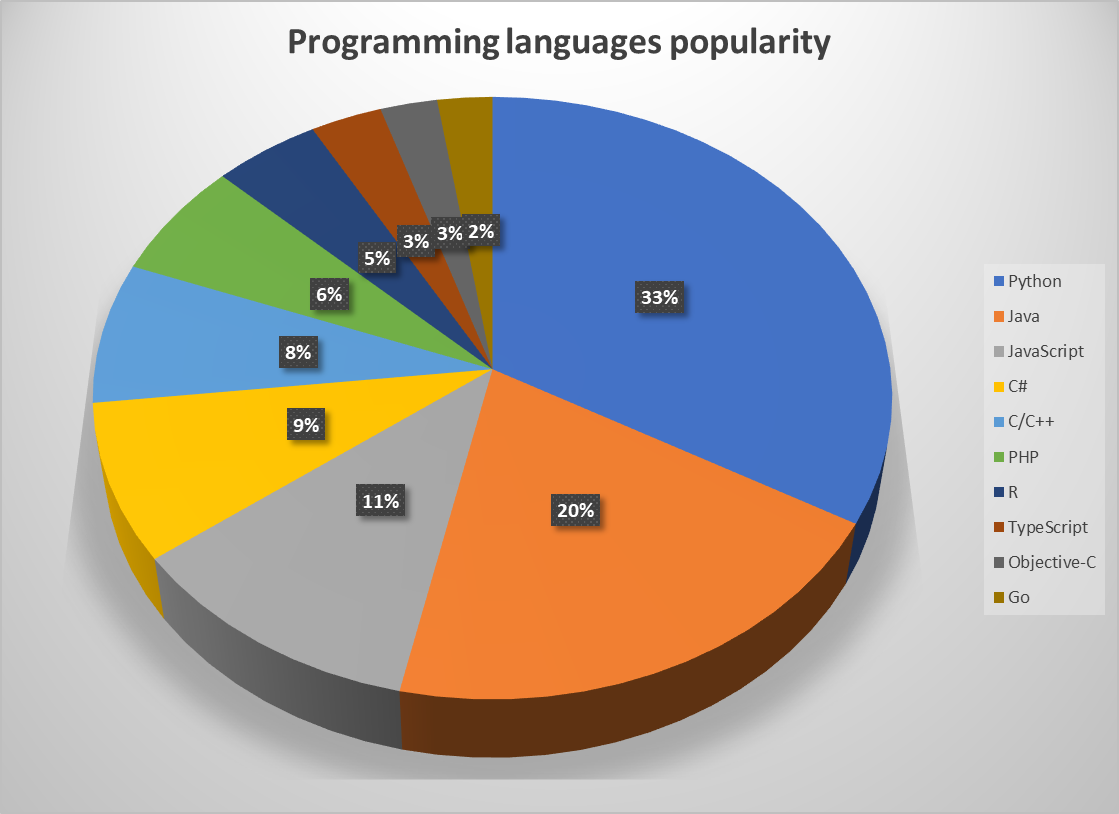


Finally, some of the most useful packages for data science (such as Tensorflow or scikit-learn) are Python-based:


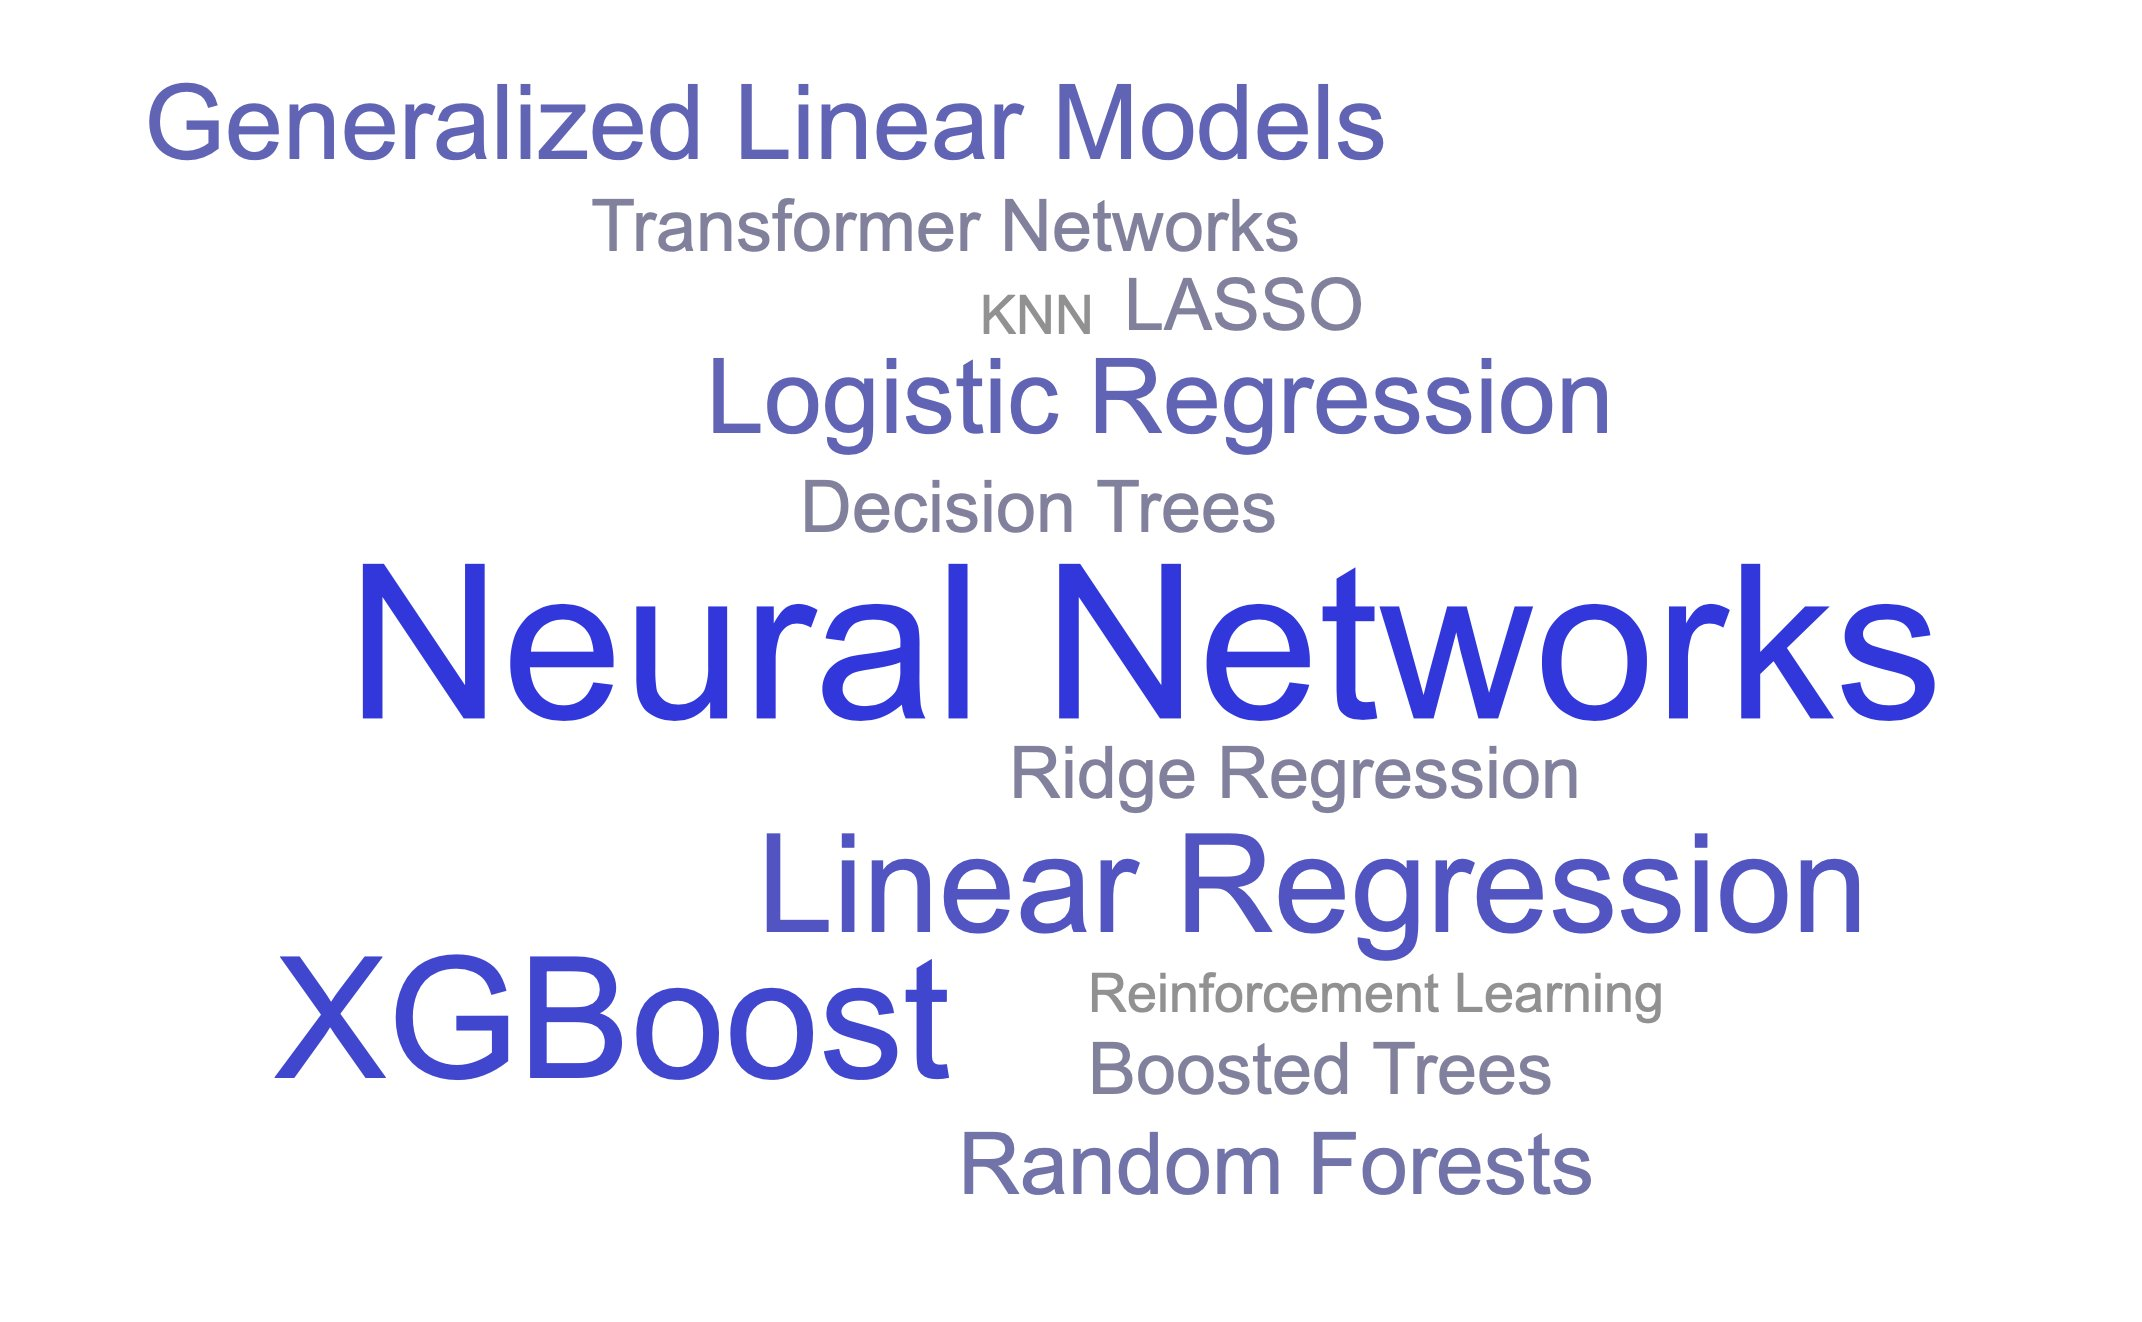

Due to the following reasons we chose to use Python exclusively in this course.


## Google Colab
Throughout this course we'll be using Google Colab as our framework. In their own words:

><h1>What is Colab?</h1>
>
>Colab, or "Colaboratory", allows you to write and execute Python in your >browser, with 
>- Zero configuration required
>- Free access to GPUs
>- Easy sharing
>
>Whether you're a **student**, a **data scientist** or an **AI researcher**, >Colab can make your work easier. Watch [Introduction to Colab](https://www.>youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

## Installing packages

Much of the work in Python is dependent on off-the-shelf packages. Usually, when writing a Python program the first lines will include a list of import statements for all relevant packages. Some of these packages are included in the Python Standard Library, which means they're built-in and come with Python. However, most domain-specific packages are not included, and we'll have to download them. 

Our main tool for dealing with packages is pip. It's a package manager that allows us to download packages from online repositories, and then extract them from several file types - most notably .whl (wheel) files which are the commom choice for package creation in Python. We'll begin by upgrading pip:

In [1]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 28.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


Google Colab already has a large amount of packages built-in, which saves us a lot of work. Just for the sake of future references we'll show a few examples.

In [2]:
import numpy as np

Let's say that we'd like to install NumPy. It's the most useful package for mathematical computations, and we'll use it plenty of times throughout the course.

In [3]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


pip also allows us to install a specific version of a package, for example:

In [4]:
!pip install numpy==1.21.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 68.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


## Machine learning example


An integral part of being a data scientist is learning how to deal with different sorts of datasets. 
scikit-learn has a few built-in datasets. In this example we'll show how to prepare a wine classification dataset. The dataset contains 13 different features that describe 3 different wines. Our goal is to correctly predict the wine given a set of features. You can read more about this dataset [here](https://archive.ics.uci.edu/ml/datasets/wine).

### Data exploration (EDA)

We'll begin by importing the required packages:

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm as notebook_tqdm

We'll procceed to load the wine dataset:

In [6]:
data = datasets.load_wine()
print(type(data))

<class 'sklearn.utils.Bunch'>


### Features

Note that the type of the variable data is 'sklearn.utils.Bunch'. We'd like to convert it into a Pandas dataframe for the sake of convenience.

In [7]:
features_df = pd.DataFrame(data.data, columns=data.feature_names)
features_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Remove long name:

In [8]:
features_df = features_df.rename(columns={"od280/od315_of_diluted_wines": "od280"})
features_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Now we can use standard Pandas methods to explore the attribues of the data:

In [9]:
features_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Visualizations

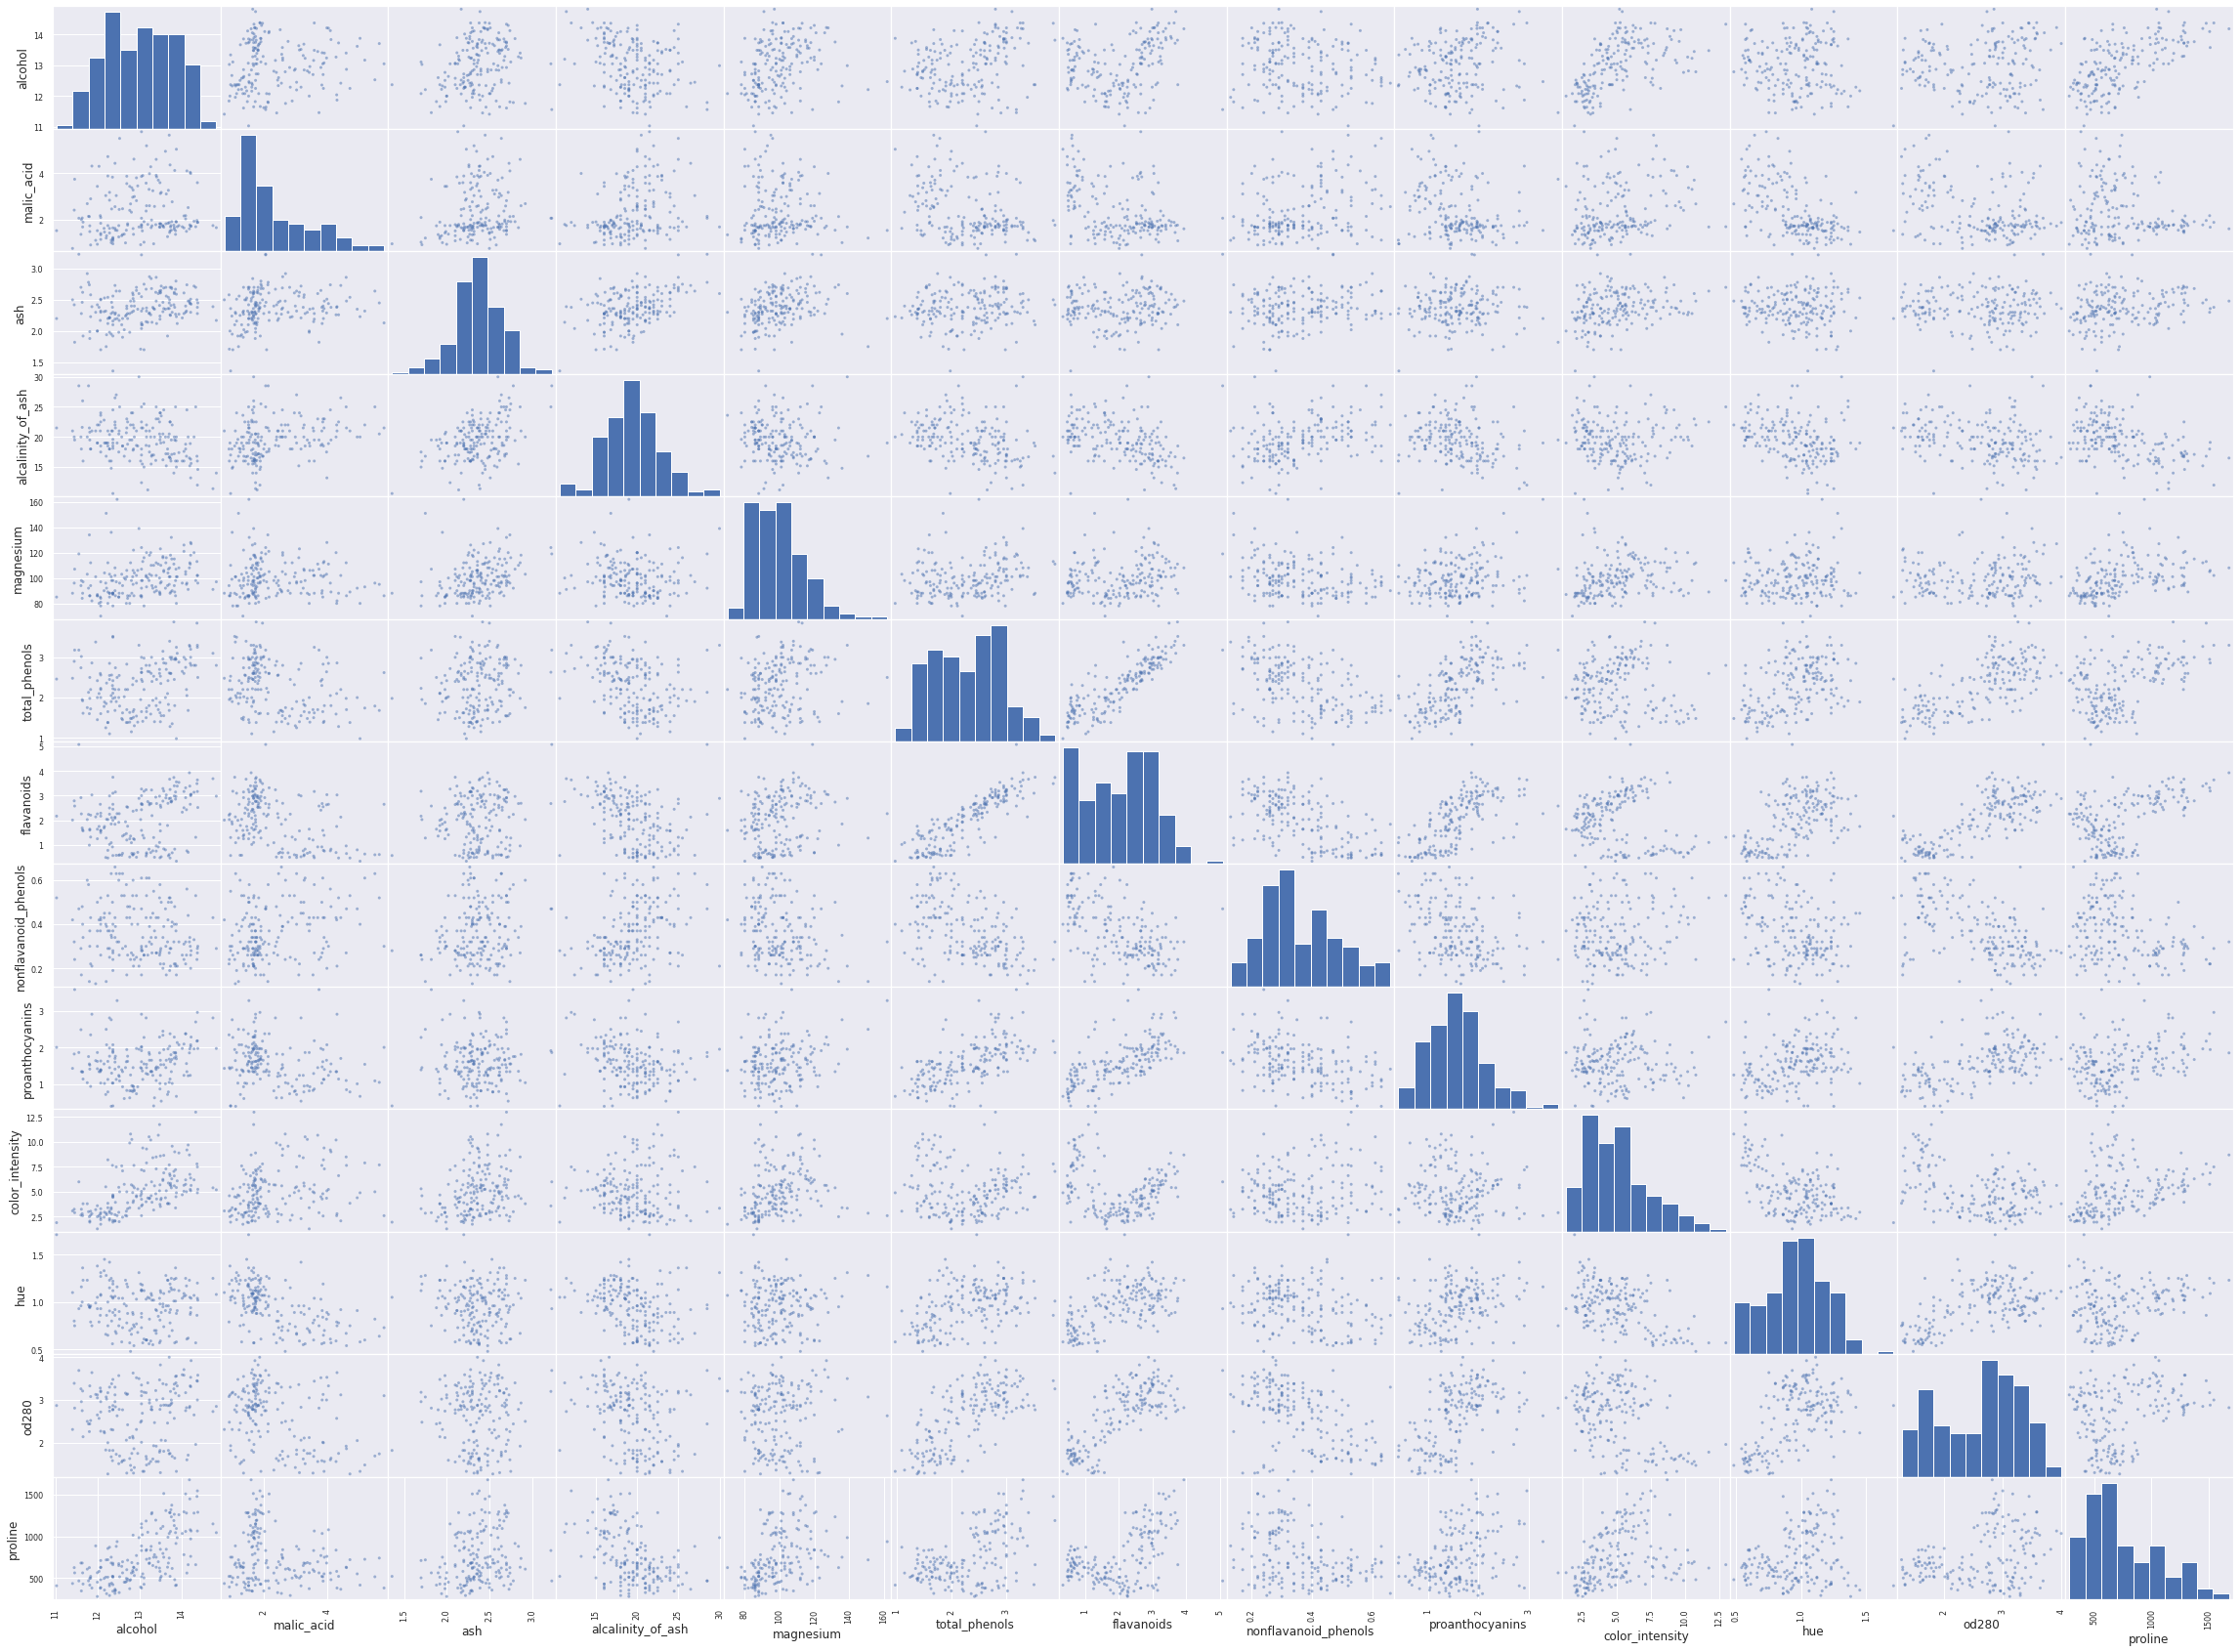

In [10]:
sns.set()
pd.plotting.scatter_matrix(features_df, alpha=0.5, figsize=(40, 30))
plt.show()

Create Pearson correlation matrix:

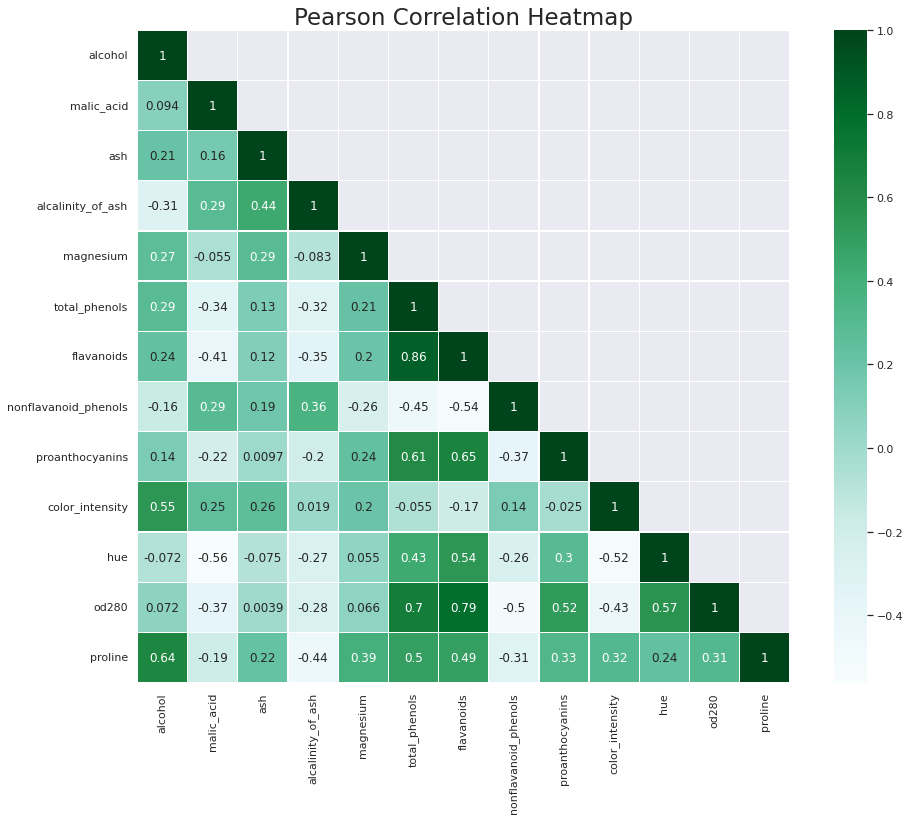

In [11]:
corr_df = features_df.corr()
mask = np.zeros_like(corr_df, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True

fig, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Heatmap', fontsize=23)

sns.heatmap(corr_df, linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask)

Let's see how a perfect fit looks like:

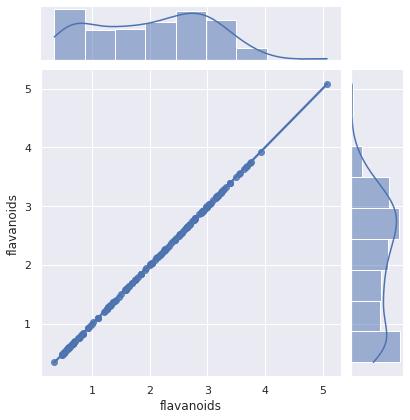

In [12]:
sns.jointplot(x=features_df['flavanoids'], 
              y=features_df['flavanoids'], 
              data=features_df, 
              kind="reg")
plt.show()

And now for two closely correlated variables:

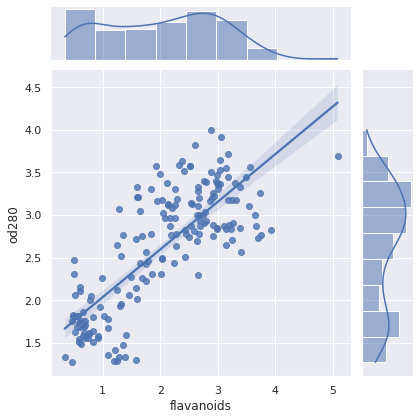

In [13]:
sns.jointplot(x=features_df['flavanoids'], 
              y=features_df['od280'], 
              data=features_df, 
              kind="reg")
plt.show()

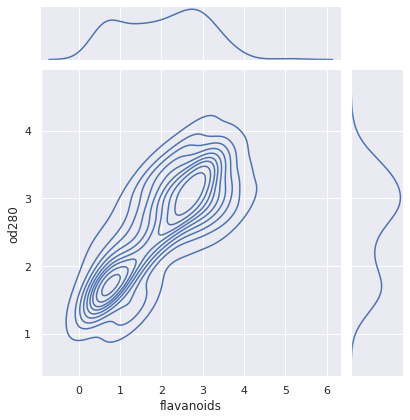

In [14]:
sns.jointplot(x=features_df['flavanoids'], 
              y=features_df['od280'], 
              data=features_df, 
              kind="kde")
plt.show()

And for two uncorrelated variables:

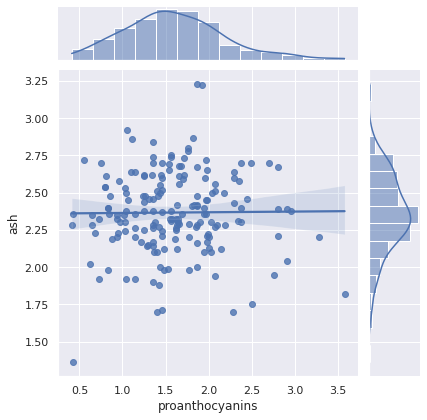

In [15]:
sns.jointplot(x=features_df['proanthocyanins'], 
              y=features_df['ash'], 
              data=features_df, 
              kind="reg")
plt.show()

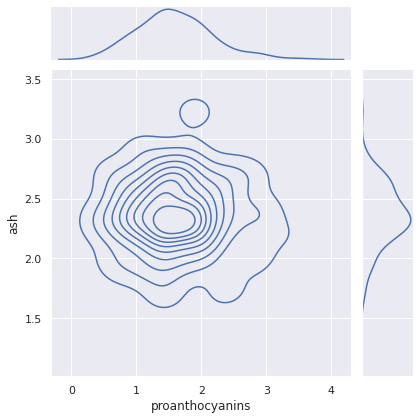

In [16]:
sns.jointplot(x=features_df['proanthocyanins'], 
              y=features_df['ash'], 
              data=features_df, 
              kind="kde")
plt.show()

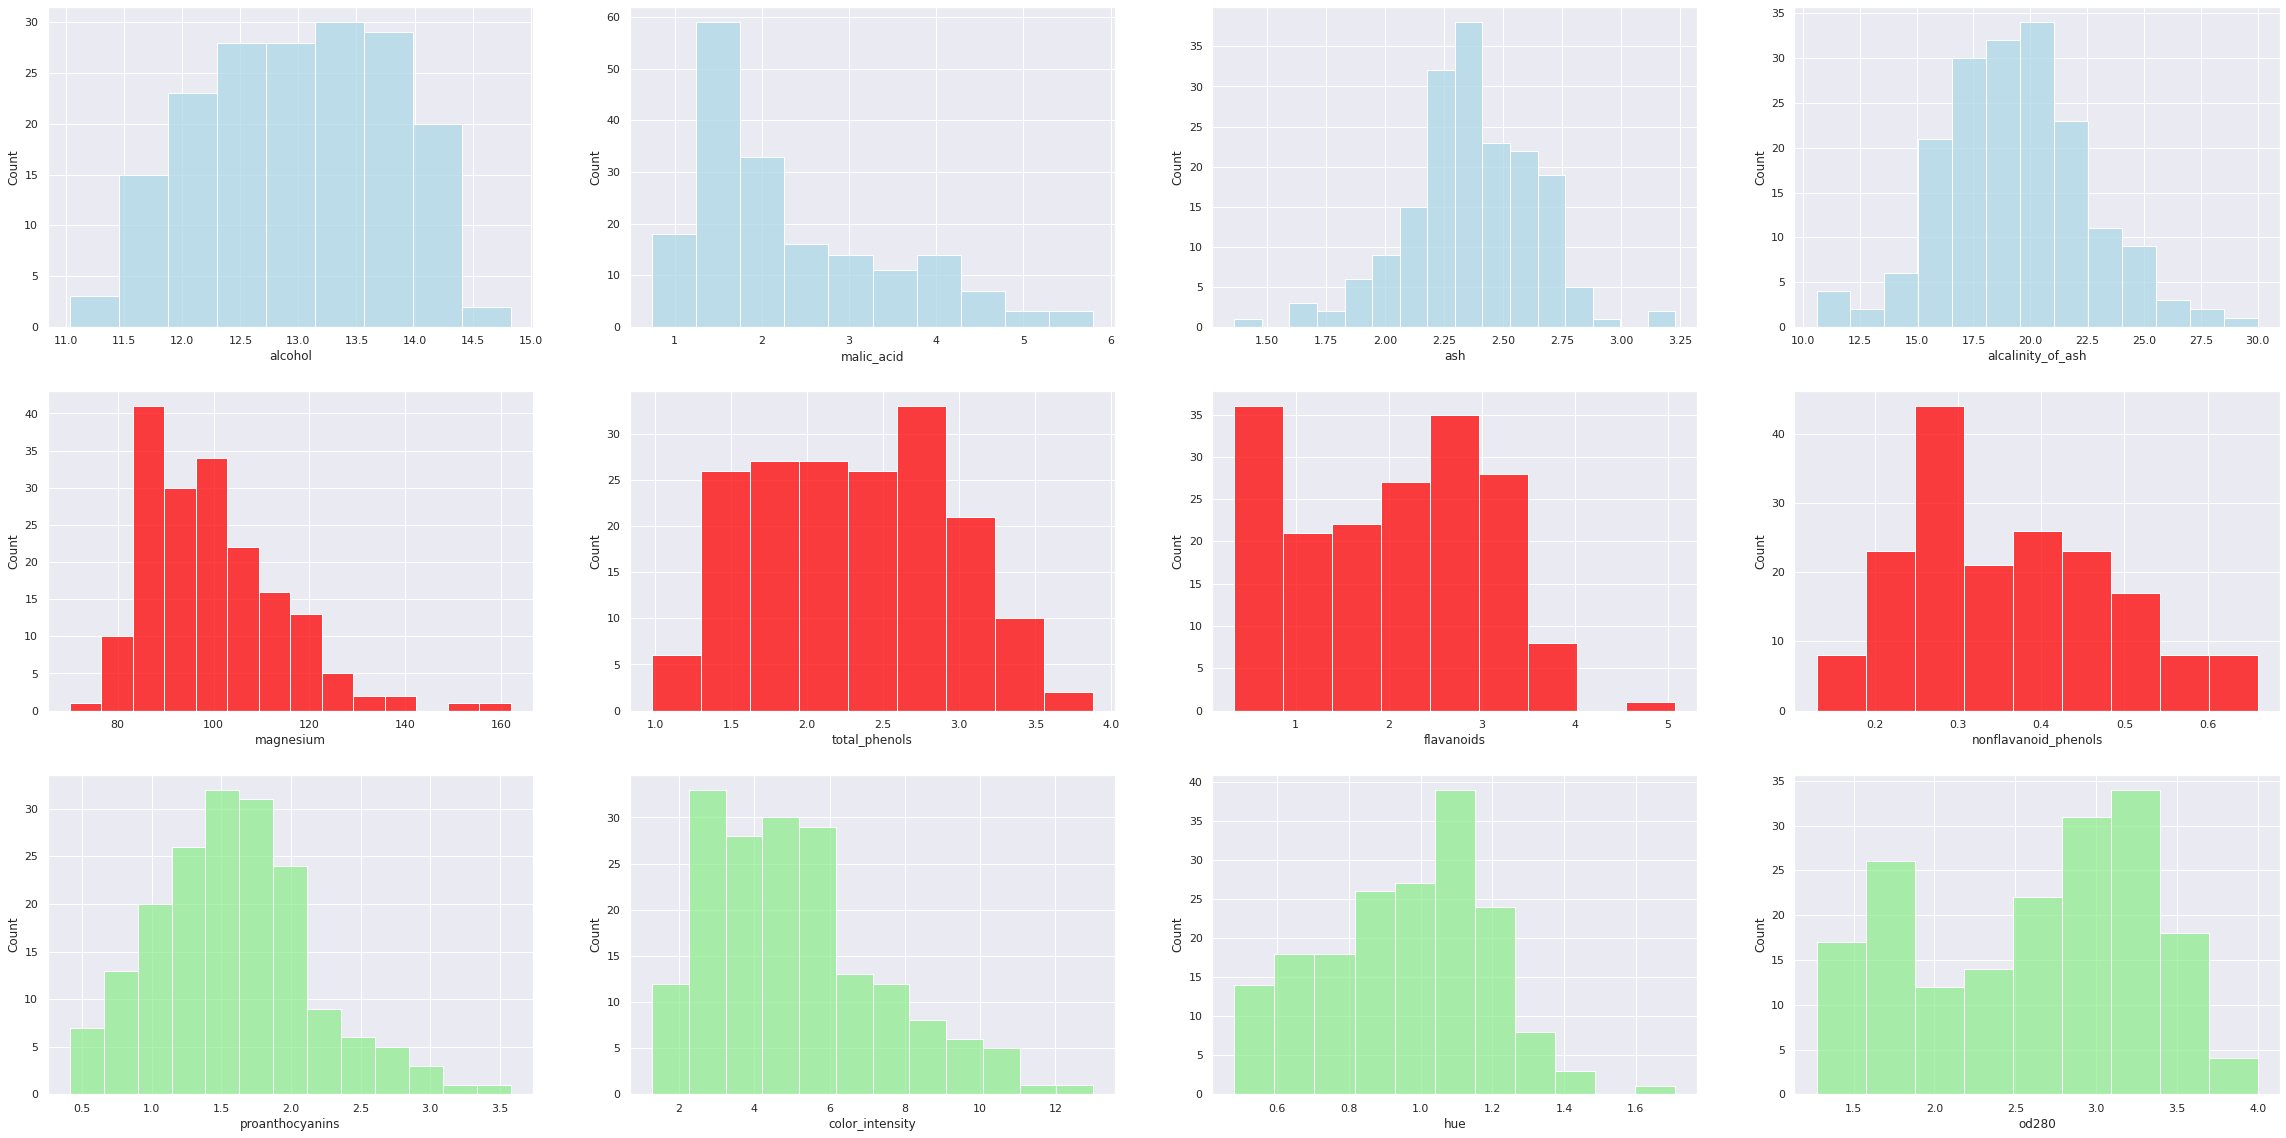

In [17]:
figure, axes = plt.subplots(3, 4, figsize=(40, 20))

def get_color(row):
  if row == 0:
    return 'lightblue'
  if row == 1:
    return 'red'
  else:
    return 'lightgreen'

for i in range(3):
  for j in range(4):
    sns.histplot(features_df[features_df.columns[4 * i + j]], ax=axes[i, j], color=get_color(i))
plt.show()

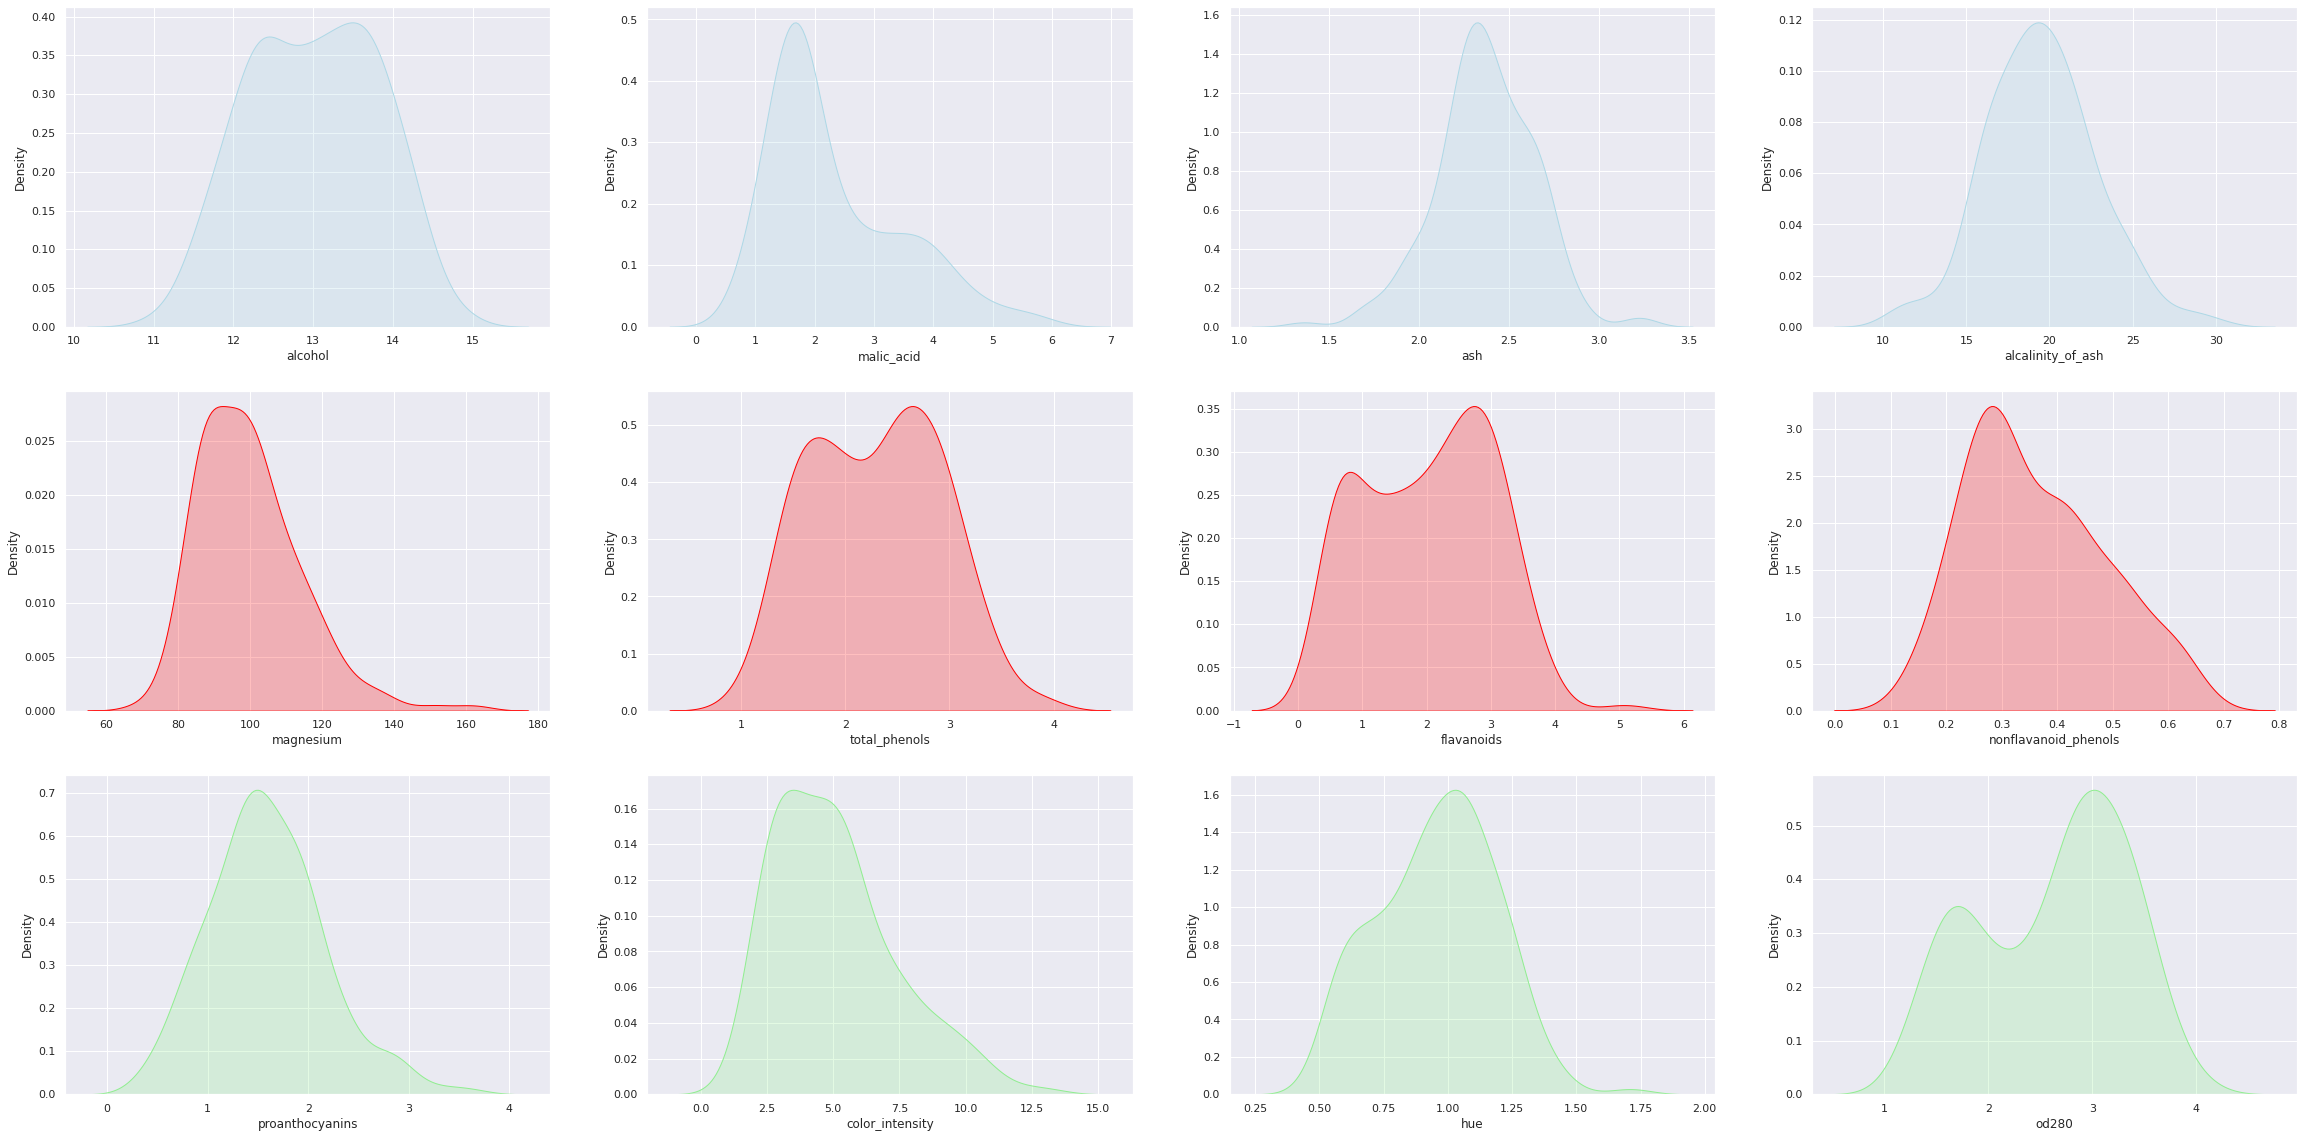

In [18]:
figure, (axes) = plt.subplots(3, 4, figsize=(40, 20))
sns.set(style="darkgrid")

for i in range(3):
  for j in range(4):
    sns.kdeplot(features_df[features_df.columns[4 * i + j]], shade=True, ax=axes[i, j], color=get_color(i))
plt.show()

### Labels

This dataframe includes only the features of each sample, and doesn't include labels. We'll load the labels and explore them:

In [19]:
labels_df = pd.DataFrame(data.target, columns=["wine_class"])
labels_df

,wine_class
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


We see there are 178 samples, just like in the feautres dataframe.

In [20]:
labels_df["wine_class"].unique()

array([0, 1, 2])

As expected, there are indeed 3 different classes. 

In [21]:
labels_df.groupby("wine_class").size()

wine_class
0    59
1    71
2    48
dtype: int64

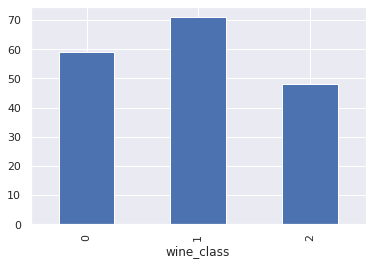

In [22]:
labels_df.groupby("wine_class").size().plot.bar()

In [23]:
labels_df.groupby("wine_class").size()/labels_df.count()["wine_class"]

wine_class
0    0.331461
1    0.398876
2    0.269663
dtype: float64

The dataset is also quite balanced between the 3 classes.
We'll follow standard machine learning methodology and notations by splitting the data into training and testing datasets: 

In [24]:
X, Y = features_df, labels_df
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


### Cross validation

At this point our data is processed and ready to be used. We'll feed it into a random forrest algorithm and test the results using different hyperparameters. We'll evaluate our results using cross-validation. 

According to Random Forest theory, by increasing the number of trees in the ensemble we should get better results. 

We'll begin by setting a random seed:

In [27]:
# No seed
np.random.rand()

0.9545925303290742

In [30]:
# With fixed seed:
np.random.seed(42)
np.random.rand()

0.3745401188473625

We'll use K-fold cross validation:

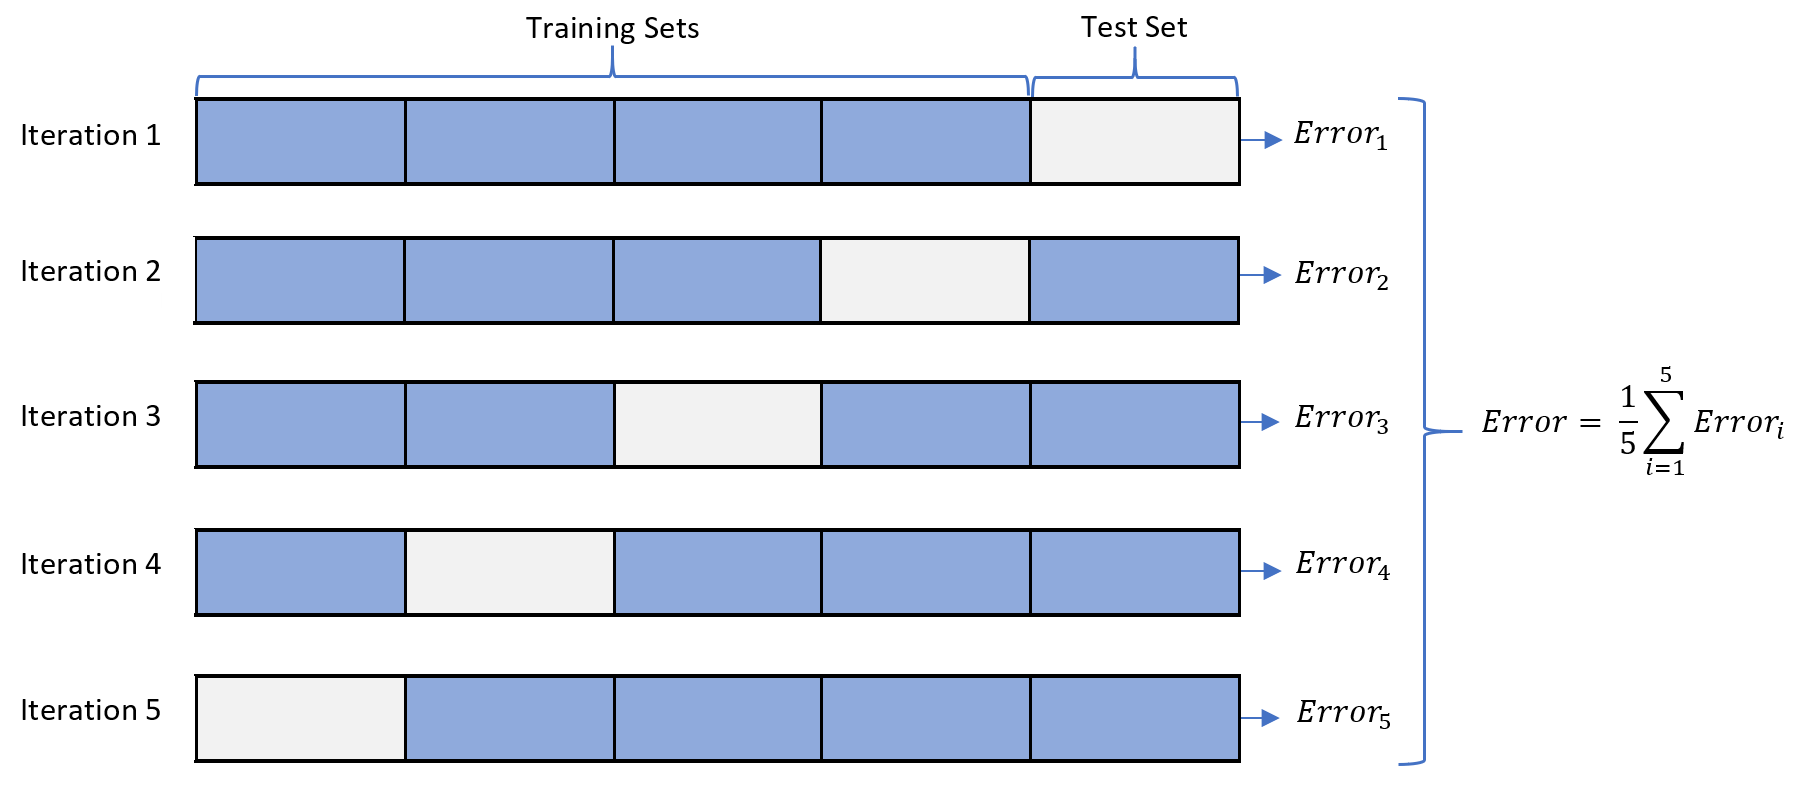

In [31]:
# Setting a seed means we'll be able to replicate the same experiment since the randomization will stay the same.
np.random.seed(42)

# Cross-validating the data
kfold = KFold(n_splits=3)

### Random Forest

We'll use [sklearn's random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [32]:
cv_scores = []
for n in notebook_tqdm(range(1, 11)):
    # Creating the random forest model with n trees
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    
    # Computing the mean score over all k partitions
    cv_result = cross_val_score(model, X_train, Y_train.values.ravel(), cv=kfold, scoring="accuracy")
    cv_scores.append((n, cv_result.mean()))
    print('Full CV vector: ', cv_result, ' Mean score: ', cv_result.mean())
        
optimal_num_of_trees = sorted(cv_scores, key=lambda x: x[1], reverse=True)[0]
print('Optimal number of trees is: ', optimal_num_of_trees[0])

  0%|          | 0/10 [00:00<?, ?it/s]

Full CV vector:  [0.78571429 0.90243902 0.7804878 ]  Mean score:  0.8228803716608595
Full CV vector:  [0.80952381 0.85365854 0.80487805]  Mean score:  0.8226867982965546
Full CV vector:  [0.80952381 0.92682927 0.87804878]  Mean score:  0.8714672861014324
Full CV vector:  [0.92857143 0.95121951 0.90243902]  Mean score:  0.9274099883855982
Full CV vector:  [0.85714286 0.95121951 0.92682927]  Mean score:  0.9117305458768873
Full CV vector:  [0.95238095 0.95121951 0.92682927]  Mean score:  0.9434765776229191
Full CV vector:  [0.9047619  0.95121951 0.95121951]  Mean score:  0.9357336430507162
Full CV vector:  [0.95238095 0.95121951 0.95121951]  Mean score:  0.9516066589237321
Full CV vector:  [0.95238095 0.95121951 0.92682927]  Mean score:  0.9434765776229191
Full CV vector:  [0.95238095 0.95121951 0.92682927]  Mean score:  0.9434765776229191
Optimal number of trees is:  8


Let's plot it:

In [33]:
cv_scores

[(1, 0.8228803716608595),
 (2, 0.8226867982965546),
 (3, 0.8714672861014324),
 (4, 0.9274099883855982),
 (5, 0.9117305458768873),
 (6, 0.9434765776229191),
 (7, 0.9357336430507162),
 (8, 0.9516066589237321),
 (9, 0.9434765776229191),
 (10, 0.9434765776229191)]

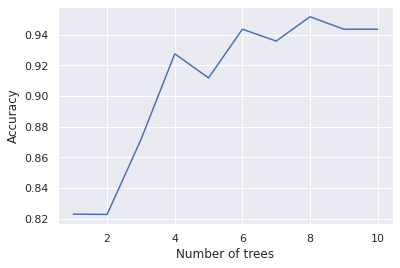

In [34]:
x_index = np.array([cv[0] for cv in cv_scores])
y_value = np.array([cv[1] for cv in cv_scores])

plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.plot(x_index, y_value)

Let's use linear regression to find the overall trend in the data:

In [35]:
regr = LinearRegression()
regr.fit(x_index.reshape(-1, 1), y_value)
regression_line = regr.predict(x_index.reshape(-1, 1))
regression_line

array([0.84225883, 0.85673342, 0.87120802, 0.88568261, 0.90015721,
       0.9146318 , 0.92910639, 0.94358099, 0.95805558, 0.97253018])

And plot the regression:

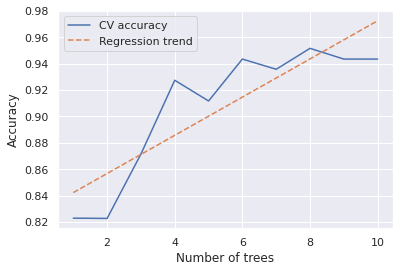

In [36]:
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.plot(x_index, y_value, label='CV accuracy')
plt.plot(x_index, regression_line, '--', label='Regression trend')
plt.legend()

Verify:

In [37]:
pd.DataFrame({'x': x_index, 'y': y_value})

,x,y
0,1,0.822880
1,2,0.822687
2,3,0.871467
3,4,0.927410
4,5,0.911731
5,6,0.943477
6,7,0.935734
7,8,0.951607
8,9,0.943477
9,10,0.943477


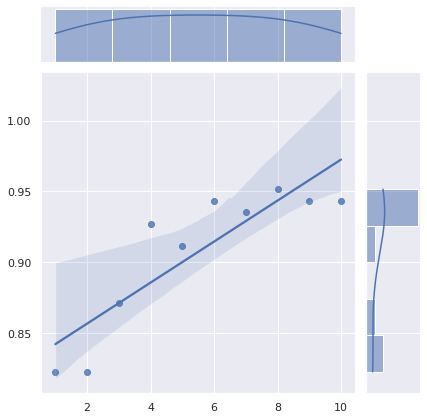

In [38]:
sns.jointplot(x=x_index, 
              y=y_value, 
              data=pd.DataFrame({'x': x_index, 'y': y_value}), 
              kind="reg")
plt.show()

Let's examine some more metrics related to the best model:

In [39]:
model = RandomForestClassifier(n_estimators=optimal_num_of_trees[0], random_state=42)
model.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(n_estimators=8, random_state=42)

Predict on test set:

In [40]:
Y_pred = model.predict(X_test)
Y_pred

array([2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 0, 1, 1,
       1, 0, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 1,
       0, 2, 1, 1, 2, 0, 2, 2, 2, 0])

In [41]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.96      0.98        23
           2       0.94      1.00      0.97        16

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



And we see that we have a near-perfect model in this case. Let's examine its confusion matrix:

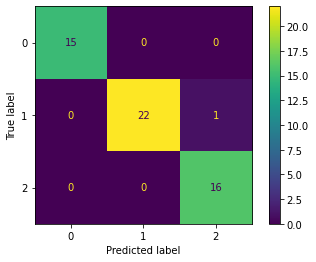

In [42]:
sns.reset_orig()
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred)).plot()